In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2024-02-02 04:40:34--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2024-02-02 04:40:35--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd0f8cf9f9a859c634c4943e20f.dl.dropboxusercontent.com/cd/0/inline/CMdYy8w9D6ziwNqSVEeCKvZAhimVMO3HskKD3FvhV1UcfSM1WPx9LyUGBtcX6Rw-uzQBn7IV9O4qHV6H2r1E3tbTK1MXwHMUGTQbDAqqI6G1WN28y3523CKWJELSpgZh2DE/file# [following]
--2024-02-02 04:40:35--  https://ucd0f8cf9f9a859c634c4943e20f.dl.dropboxusercontent.com/cd/0/inline/CMdYy8w9D6ziwNqSVEeCKvZAhimVMO3Hs

In [ ]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [ ]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [ ]:
len(os.listdir('test'))

79726

In [ ]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


No. of train images = 22,424
No. of test images = 79,726

In [ ]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Test directory
%mkdir Test

In [ ]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical'

)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [ ]:
type(test_generator)

keras.src.preprocessing.image.DirectoryIterator

In [ ]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

# Fit

In [ ]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 91s 148ms/step - loss: 4.2027 - accuracy: 0.1154 - val_loss: 3.5397 - val_accuracy: 0.2375
Epoch 2/10
560/560 [==============================] - 82s 146ms/step - loss: 3.3275 - accuracy: 0.2330 - val_loss: 2.0684 - val_accuracy: 0.2920
Epoch 3/10
560/560 [==============================] - 84s 150ms/step - loss: nan - accuracy: 0.2763 - val_loss: nan - val_accuracy: 0.1107
Epoch 4/10
560/560 [==============================] - 85s 151ms/step - loss: nan - accuracy: 0.1112 - val_loss: nan - val_accuracy: 0.1109
Epoch 5/10
560/560 [==============================] - 85s 152ms/step - loss: nan - accuracy: 0.1110 - val_loss: nan - val_accuracy: 0.1109
Epoch 6/10
560/560 [==============================] - 88s 156ms/step - loss: nan - accuracy: 0.1111 - val_loss: nan - val_accuracy: 0.1109
Epoch 7/10
560/560 [==============================] - 85s 152ms/step - loss: nan - accuracy: 0.1108 - val_loss: nan - val_accuracy: 0.1109
Epoch 8/10
560/

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [ ]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [ ]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Validate

In [ ]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [ ]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/5
560/560 [==============================] - 94s 156ms/step - loss: 1.9379 - accuracy: 0.3526 - val_loss: 1.3514 - val_accuracy: 0.5114
Epoch 2/5
560/560 [==============================] - 86s 153ms/step - loss: 1.1455 - accuracy: 0.5876 - val_loss: 0.8439 - val_accuracy: 0.7083
Epoch 3/5
560/560 [==============================] - 86s 153ms/step - loss: 0.8258 - accuracy: 0.7098 - val_loss: 0.6155 - val_accuracy: 0.7821
Epoch 4/5
560/560 [==============================] - 90s 161ms/step - loss: 0.6512 - accuracy: 0.7773 - val_loss: 0.3219 - val_accuracy: 0.8989
Epoch 5/5
560/560 [==============================] - 88s 156ms/step - loss: 0.5578 - accuracy: 0.8106 - val_loss: 0.3034 - val_accuracy: 0.9033


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

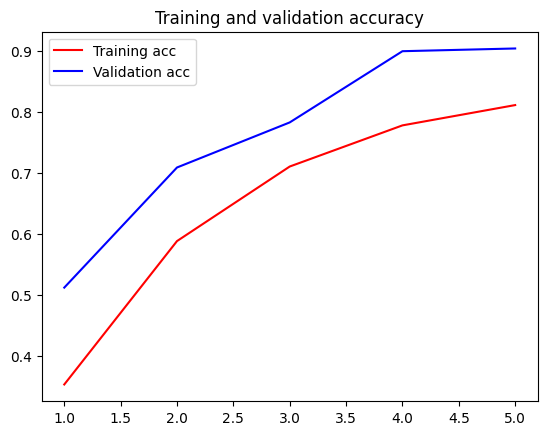

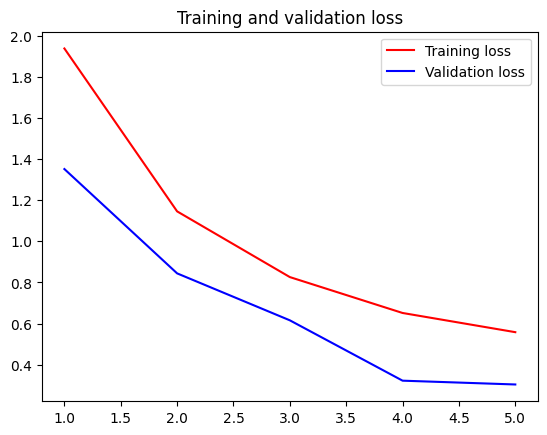

In [ ]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

39863/39863 [==============================] - 290s 7ms/step


In [ ]:
pred

array([[1.24235712e-05, 2.98561211e-08, 2.85446731e-05, ...,
        7.67442316e-07, 3.38508944e-05, 4.38157758e-06],
       [1.01371887e-04, 7.27517499e-06, 3.55375523e-04, ...,
        5.75760205e-04, 2.66241515e-03, 1.95624089e-04],
       [6.40090525e-01, 2.17498794e-01, 4.79925540e-04, ...,
        2.53309961e-04, 8.20415467e-03, 2.55751777e-02],
       ...,
       [1.21069793e-02, 1.37046706e-02, 2.08278336e-02, ...,
        5.77503582e-03, 1.22537926e-01, 3.69900689e-02],
       [7.64732761e-07, 1.04418511e-07, 9.21855196e-02, ...,
        1.29154178e-05, 6.31696880e-02, 4.86965064e-07],
       [3.13114725e-08, 1.62921161e-08, 1.60838010e-08, ...,
        1.77825676e-09, 1.58481635e-06, 1.68884471e-05]], dtype=float32)

In [ ]:
len(pred)

79726

In [ ]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,1.242357e-05,2.985612e-08,2.854467e-05,1.344293e-05,3.851229e-05,9.998604e-01,7.570904e-06,7.674423e-07,0.000034,4.381578e-06
1,1.013719e-04,7.275175e-06,3.553755e-04,3.993833e-03,1.910602e-03,9.898764e-01,3.212526e-04,5.757602e-04,0.002662,1.956241e-04
2,6.400905e-01,2.174988e-01,4.799255e-04,5.823254e-02,4.729315e-02,3.468942e-05,2.337732e-03,2.533100e-04,0.008204,2.557518e-02
3,9.002678e-03,9.769062e-04,4.983278e-03,6.134636e-05,1.172071e-02,4.903953e-05,7.250213e-01,1.965934e-03,0.241457,4.761746e-03
4,1.675310e-02,2.723179e-05,6.167199e-05,8.417417e-01,1.360080e-01,1.365633e-03,1.029045e-04,2.049708e-05,0.003689,2.299931e-04
...,...,...,...,...,...,...,...,...,...,...
79721,2.957018e-03,9.476569e-01,2.184322e-02,7.804124e-05,3.311763e-04,2.414938e-04,1.411914e-02,3.184957e-03,0.008364,1.224436e-03
79722,2.188155e-02,8.209286e-01,8.164167e-02,3.549040e-02,9.187955e-04,7.887624e-06,2.989628e-02,2.381953e-04,0.003983,5.013634e-03
79723,1.210698e-02,1.370467e-02,2.082783e-02,1.705335e-02,3.739809e-01,3.451272e-04,3.966782e-01,5.775036e-03,0.122538,3.699007e-02
79724,7.647328e-07,1.044185e-07,9.218552e-02,1.028644e-10,1.499395e-06,8.658263e-07,8.446283e-01,1.291542e-05,0.063170,4.869651e-07


In [ ]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [ ]:
from google.colab import files
files.download("Distracted_Driver_MultiAction_Classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>